# Exploratory Data Analysis
First we need to import all the required libraries  set style and apply unnecessary warnings 

In [409]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# set style
sns.set(style='whitegrid')
import warnings
# ignore warnings
warnings.filterwarnings('ignore')

# to display all the columns
pd.options.display.max_columns = None
# to display all the rows 
pd.options.display.max_rows = None

# to map empty strings 
pd.options.mode.use_inf_as_na = True

Load the dataset  

In [410]:
# read the csv file adding low_memory = False for usage warning on high memory
load_data_Eda = pd.read_csv('loan.csv', encoding='UTF-8', low_memory=False)


Check the size and shape of the dataset

In [411]:
# Observational Variables of dataframe shape
load_data_Eda.shape

(39717, 111)

Applying the descriptive statistics summary of the dataframe to chekc the possible missing values and understand the dataset more elaborately for further analysis

In [412]:
load_data_Eda.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

________________________________________________________________________________________________________________________________

# Data Cleaning


________________________________________________________________________________________________________________________________

Data is bit scrappy  with lots of missing values with respect to the columns.


In [413]:
# Data Cleaning : Check list 1
# check the missing values in dataset
load_data_Eda.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


 Let express the total number of missing values into percentage(%)

In [414]:
load_data_Eda.missing = round(100*(load_data_Eda.isnull().sum()/len(load_data_Eda.id)),2)
load_data_Eda.missing.loc[load_data_Eda.missing > 0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

Since there are many columns in the data with 100% missing values which can be safely dropped also there are columns with rate of 2% , 33% ,93% and 97% these columns can also be dropped as well, if we look at the importance of the colums having Null and Nan values  >=30% also can be dropped

Lets do it stepwise process of cleaning the data with list of checklist.

In [415]:
load_data_Eda.missing_columns = list(load_data_Eda.missing[load_data_Eda.missing >=50].index)
len(load_data_Eda.missing_columns)

57

Columns with missing values create noise and bias in the dataset , lets try to remove such columns 

In [416]:
load_data_Eda = load_data_Eda.drop(load_data_Eda.missing_columns, axis=1)
load_data_Eda.shape

(39717, 54)

Lets investigate further on addressing the missing values

In [417]:
load_data_Eda.missing=round(100*(load_data_Eda.isnull().sum()/len(load_data_Eda.id)),2)
load_data_Eda.missing[load_data_Eda.missing != 0]


emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [418]:
# Its shows that 'desc' has quite missing values , if we look at the data dictionary columns 'purpose' has quite same 
# meaningful information with corresponding to 'desc' columns so lets drop it
load_data_Eda = load_data_Eda.drop('desc',axis=1)

In [419]:
load_data_Eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [420]:
# Still we have some missing values in our dataset, drill down further analysis of addressing the missing values check the unique values in the above missing columns
print("Emp_title : %d"  % len(load_data_Eda.emp_title.unique()))
print("Emp_length : %d"  % len(load_data_Eda.emp_length.unique()))
print("Title : %d"  % len(load_data_Eda.title.unique()))
print("Revol_util : %d"  % len(load_data_Eda.revol_util.unique()))
print("Last_pymnt_day : %d"  % len(load_data_Eda.last_pymnt_d.unique()))
print("Last_credit_pull_day : %d"  % len(load_data_Eda.last_credit_pull_d.unique()))
print("Collections_12_mths_ex_med : %d"  % len(load_data_Eda.collections_12_mths_ex_med.unique()))
print("Chargeoff_within_12_mths : %d"  % len(load_data_Eda.chargeoff_within_12_mths.unique()))
print("Public_rec_bankruptcies : %d"  % len(load_data_Eda.pub_rec_bankruptcies.unique()))
print("No of tax_liens : %d"  % len(load_data_Eda.tax_liens.unique()))

Emp_title : 28821
Emp_length : 12
Title : 19616
Revol_util : 1090
Last_pymnt_day : 102
Last_credit_pull_day : 107
Collections_12_mths_ex_med : 2
Chargeoff_within_12_mths : 2
Public_rec_bankruptcies : 4
No of tax_liens : 2


In [421]:
load_data_Eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [422]:
load_data_Eda.missing=round(100*(load_data_Eda.isnull().sum()/len(load_data_Eda.id)),2)
load_data_Eda.missing[load_data_Eda.missing != 0]

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

Above clearly shows that  columns 'Emp_Length','Collections_12_mths_ex_med','Chargeoff_Within_12_mths','Public_rec_bankrupties' and 'No of tax_liens' are Categorical variables.


Now let's go ahead and find insights on these categorical dataset with regarding to missing values that it has any impact on the dataset if we opt to drop these columns for our analysis.

In [423]:
# Since 'collections_12_mths_ex_med','chargeoff_within_12_mths','pub_rec_bankruptcies' and 'tax_liens' has values with either  0 or blank, 
# values have any significant impact on the analysis.
# so lets drop these columns as well

print(load_data_Eda.tax_liens.unique())
print(load_data_Eda.chargeoff_within_12_mths.unique())
print(load_data_Eda.pub_rec_bankruptcies.unique())
print(load_data_Eda.collections_12_mths_ex_med.unique())


[ 0. nan]
[ 0. nan]
[ 0.  1.  2. nan]
[ 0. nan]


In [424]:
# lets drop columns'collections_12_mths_ex_med','chargeoff_within_12_mths','pub_rec_bankruptcies' and 'tax_liens
load_data_drop_columns = ['collections_12_mths_ex_med','tax_liens','chargeoff_within_12_mths']
load_data_Eda = load_data_Eda.drop(load_data_drop_columns, axis=1)

In [425]:
load_data_Eda.missing = round(100*(load_data_Eda.isnull().sum()/len(load_data_Eda.id)), 2) 
load_data_Eda.missing[load_data_Eda.missing != 0]

emp_title               6.19
emp_length              2.71
title                   0.03
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

In [426]:
load_data_Eda.shape

(39717, 50)

In [427]:
# we have emp_length and revol_util have missing values
# lets try to apply data imputation to check if we can fill the missing values
print('Mode :' + load_data_Eda.emp_length.mode()[0])
load_data_Eda.emp_length.value_counts()

Mode :10+ years


10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

The above value counts shows that the mode value has far higher frequency than that of the next most frequent value.
This means that we can safely assign the value of mode to the null values in the column.
Also the missing values are in very low percentage. So imputung with mode value doesnt affect the analysis much.

In [428]:
load_data_Eda.emp_length.fillna(load_data_Eda.emp_length.mode()[0], inplace = True)
load_data_Eda.emp_length.isna().sum()

0

In [429]:
load_data_Eda.missing = round(100*(load_data_Eda.isnull().sum()/len(load_data_Eda.id)), 2) 
load_data_Eda.missing[load_data_Eda.missing != 0]

emp_title               6.19
title                   0.03
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

In [430]:
load_data_Eda.shape

(39717, 50)

In [431]:
# In the above varaible we still have the missing values likewise 'public_rec_bankruptcies' has 1.75%  provides the previous defaulter of
# the borrower
load_data_Eda.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [432]:
# Since the 'pub_rec_bankruptcies' are have values of 37000 records[0] and 1600[1] and 7[2] bankruptcies cases , we can perform the data imputation data we might take it 
# in future for our analysis

load_data_Eda=load_data_Eda[~load_data_Eda.pub_rec_bankruptcies.isnull()]


In [433]:
load_data_Eda.shape

(39020, 50)

In [434]:
load_data_Eda.missing = round(100*(load_data_Eda.isnull().sum()/len(load_data_Eda.id)), 2) 
load_data_Eda.missing[load_data_Eda.missing != 0]

emp_title       6.19
title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

Now we have few more columns left for addressing the missing values , if we look at 'emp_title' has 6.19% 'title'has .03% a revol_util has .13% and last_pymnt_d has .18 % let's go ahead and remove the rows with nan/blank variables.


In [435]:
load_data_Eda=load_data_Eda[~load_data_Eda.emp_title.isnull()]
load_data_Eda=load_data_Eda[~load_data_Eda.title.isnull()]
load_data_Eda=load_data_Eda[~load_data_Eda.revol_util.isnull()]
load_data_Eda=load_data_Eda[~load_data_Eda.last_pymnt_d.isnull()]

In [436]:
load_data_Eda.missing = round(100*(load_data_Eda.isnull().sum()/len(load_data_Eda.id)), 2) 
load_data_Eda.missing[load_data_Eda.missing != 0]

Series([], dtype: float64)

In [437]:
load_data_Eda.shape

(36489, 50)

In [438]:
load_data_Eda.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    864
funded_amnt                 1025
out_prncp                   1065
out_prncp_

If we look at above summary of the dataset it either single unique value or all unique values , perhaps the data dictionary provide a better understanding on the columns, since there types of variable doesnt have to provide more contribution on the anaylsis of our use case , so its better to drop off.

In [439]:
load_data_Eda_col_to_drop = ['delinq_amnt','acc_now_delinq','id','member_id','initial_list_status','url','policy_code','application_type','funded_amnt','funded_amnt_inv','pymnt_plan','zip_code']
load_data_Eda = load_data_Eda.drop(load_data_Eda_col_to_drop, axis=1)


In [440]:
load_data_Eda.shape

(36489, 38)

Standardizing the data
"revol_util" column although described as an object column, it has continous values.
So we need to standardize the data in this column
"int_rate" is one such column.
"emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }
Although the datatype of "term" is arguable to be an integer, there are only two values in the whole column and it might as well be declared a categorical variable

In [441]:
load_data_Eda.revol_util = pd.to_numeric(load_data_Eda.revol_util.apply(lambda x:x .split('%')[0]))

In [442]:
load_data_Eda.int_rate = pd.to_numeric(load_data_Eda.int_rate.apply(lambda x : x.split('%')[0]))


In [443]:
load_data_Eda.emp_length = pd.to_numeric(load_data_Eda.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))


In [444]:
load_data_Eda.shape

(36489, 38)

In [445]:
# lets apply the precision values to the columns such as 'collection_recovery_fee','total_rec_late_fee','total_pymnt'
print(load_data_Eda.total_pymnt.value_counts().tail())
print(load_data_Eda.total_rec_late_fee.value_counts().tail())
print(load_data_Eda.collection_recovery_fee.value_counts().tail())

6639.271020     1
5661.170000     1
40297.372600    1
9536.544293     1
3579.662273     1
Name: total_pymnt, dtype: int64
30.260000    1
14.946207    1
25.530000    1
14.987132    1
52.262227    1
Name: total_rec_late_fee, dtype: int64
15.4440     1
9.5864      1
14.5170     1
15.3684     1
668.3600    1
Name: collection_recovery_fee, dtype: int64


In [446]:
# lets round the precision value for 2 digits
load_data_Eda.collection_recovery_fee = round(load_data_Eda.collection_recovery_fee,2)
load_data_Eda.total_rec_late_fee = round(load_data_Eda.total_rec_late_fee,2)
load_data_Eda.total_pymnt = round(load_data_Eda.total_pymnt,2)

Now lets deal with the datetime columns in the dataset



In [447]:
load_data_Eda_datetime = ['last_pymnt_d','earliest_cr_line','last_credit_pull_d','issue_d']
load_data_Eda[load_data_Eda_datetime].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36489 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   last_pymnt_d        36489 non-null  object
 1   earliest_cr_line    36489 non-null  object
 2   last_credit_pull_d  36489 non-null  object
 3   issue_d             36489 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


If we look at above columns of the datetime like 'issue_d','earliest_cr-line','last_pymnt_d,'last_credit_pull_d' has object type , lets convert it into datetime dtype columns

In [448]:
# convert the columns from object dtype to datetime dtype.
load_data_Eda.issue_d = pd.to_datetime(load_data_Eda.issue_d, format='%b-%y')
load_data_Eda.earliest_cr_line = pd.to_datetime(load_data_Eda.earliest_cr_line, format='%b-%y')
load_data_Eda.last_credit_pull_d = pd.to_datetime(load_data_Eda.last_credit_pull_d, format='%b-%y')
load_data_Eda.last_pymnt_d = pd.to_datetime(load_data_Eda.last_pymnt_d, format='%b-%y')


In [449]:
# check with the variable converted to the datetime dtype
load_data_Eda[load_data_Eda_datetime].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36489 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   last_pymnt_d        36489 non-null  datetime64[ns]
 1   earliest_cr_line    36489 non-null  datetime64[ns]
 2   last_credit_pull_d  36489 non-null  datetime64[ns]
 3   issue_d             36489 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


In [450]:
load_data_Eda.shape

(36489, 38)

In [451]:
load_data_Eda[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36489 entries, 1 to 39680
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   int_rate    36489 non-null  float64
 1   revol_util  36489 non-null  float64
dtypes: float64(2)
memory usage: 855.2 KB


In [452]:
# We are trying to check with the emp_length if it properly in range.
load_data_Eda.emp_length.value_counts()


10    8463
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

In [453]:
# check with term columns since it have month as prefix with the no of month
load_data_Eda.term.value_counts() 

 36 months    26422
 60 months    10067
Name: term, dtype: int64

In [454]:
# lets try to strip months keyword in the colums term
load_data_Eda['term']=load_data_Eda.term.apply(lambda x:x.split()[0])
load_data_Eda.term.value_counts()

36    26422
60    10067
Name: term, dtype: int64

In [455]:
# In the data dictionary  house_ownership variable has valid values however we have 3 records  with NONE , doesnt seems to have any impact since its minimum numbers.
# lets drop the records with None.
load_data_Eda = load_data_Eda[load_data_Eda.home_ownership != 'None']
load_data_Eda.home_ownership.value_counts()

RENT        17492
MORTGAGE    16318
OWN          2585
OTHER          94
Name: home_ownership, dtype: int64

In [456]:
load_data_Eda.shape

(36489, 38)

Derived Metrics: Data Driven Metrics

In [457]:
#Now lets go the 'issue_d' columns which are in 'dec-11' format lets split the date into month and year column 
load_data_Eda['issue_d_month']= load_data_Eda['issue_d'].dt.month
load_data_Eda['issue_d_year']= load_data_Eda['issue_d'].dt.year


In [458]:
load_data_Eda.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_month,issue_d_year
1,2500,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,12,2011
3,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,12,2011
4,3000,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,2011-12-01,Current,other,Personal,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,12,2011
5,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,12,2011
6,7000,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,NC,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,12,2011


In [459]:
# The colums earliest_cr_line date with 2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054 since it quite unrealistic so lets create
# new colums with earliest_cr_line_month and year and try fix the data
load_data_Eda['earliest_cr_line_month']=load_data_Eda['earliest_cr_line'].dt.month
load_data_Eda['earliest_cr_line_year']=load_data_Eda['earliest_cr_line'].dt.year

In [460]:
load_data_Eda['earliest_cr_line_year'].info()

<class 'pandas.core.series.Series'>
Int64Index: 36489 entries, 1 to 39680
Series name: earliest_cr_line_year
Non-Null Count  Dtype
--------------  -----
36489 non-null  int64
dtypes: int64(1)
memory usage: 570.1 KB


In [461]:
# list out the earliest_cr_line_year colums with value more than 2010 
load_data_Eda[load_data_Eda['earliest_cr_line_year'] > 2010 ]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054],
      dtype=int64)

In [254]:
# seems to be problem with year entries in the dataset , may be system issues or dateerror with the data loaded 
# Lets impute by considering the earliest_cr_line_year values more than 2010 , derived it with 100 to fit in our dataset.

In [462]:
load_data_Eda.loc[load_data_Eda['earliest_cr_line_year'] > 2010, 'earliest_cr_line_year']= load_data_Eda['earliest_cr_line_year']-100

In [463]:
load_data_Eda.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       2
1965       6
1966       7
1967      13
1968      12
1969      22
1970      35
1971      34
1972      34
1973      42
1974      51
1975      57
1976      73
1977      90
1978     131
1979     141
1980     150
1981     154
1982     196
1983     297
1984     361
1985     406
1986     447
1987     566
1988     672
1989     781
1990     947
1991     884
1992     972
1993    1401
1994    1863
1995    1977
1996    2075
1997    2273
1998    2646
1999    2765
2000    3040
2001    2364
2002    1796
2003    1744
2004    1644
2005    1409
2006    1081
2007     671
2008     146
Name: loan_amnt, dtype: int64

In [464]:
# check any value of earliest_cr_line_year more than 2010
len(load_data_Eda[load_data_Eda['earliest_cr_line_year']> 2010])

0

In [465]:
load_data_Eda.head()
load_data_Eda.shape

(36489, 42)

# Outlier Treatment

<AxesSubplot:xlabel='annual_inc'>

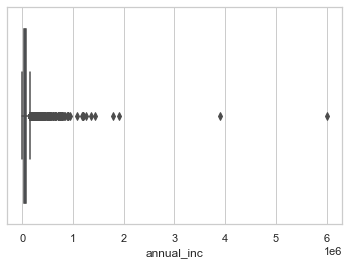

In [466]:
sns.boxplot(load_data_Eda['annual_inc'])


There are few presence of outliers 

In [371]:
#removing outliers would be good option however lets treat with quantile function and if above 95% should be disregard from the distribution
# consider the threshold of removing outlierswith 0.95 

quantile_info = load_data_Eda.annual_inc.quantile([0.5,0.75, 0.90, 0.95,0.97,0.98,0.99])
quantile_info

0.50     60000.00
0.75     83000.00
0.90    115000.00
0.95    140000.00
0.97    163000.00
0.98    182608.48
0.99    230000.00
Name: annual_inc, dtype: float64

In [372]:
annual_inc_95_per = load_data_Eda['annual_inc'].quantile(0.95)
load_data_Eda = load_data_Eda[load_data_Eda.annual_inc <= annual_inc_95_per]

<AxesSubplot:xlabel='annual_inc'>

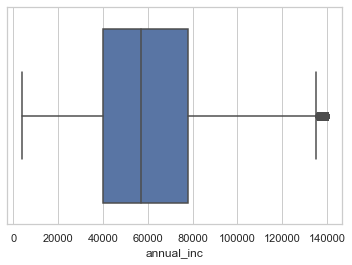

In [373]:
sns.boxplot(load_data_Eda.annual_inc)

Now the annual_inc looks pretty good to proceed with columns dti , loan_amt 

<AxesSubplot:xlabel='dti'>

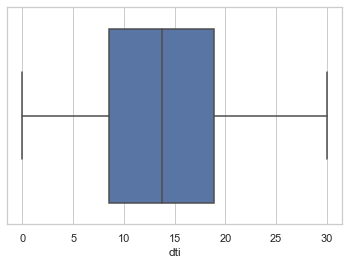

In [374]:
sns.boxplot(load_data_Eda.dti)

<AxesSubplot:xlabel='loan_amnt'>

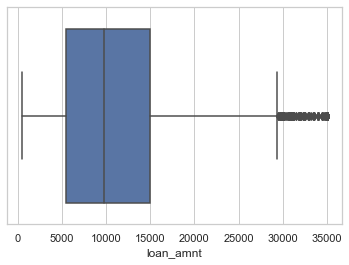

In [375]:
sns.boxplot(load_data_Eda.loan_amnt)

In [467]:
# loan_amnt got lots of outliers let treat them with quantile function 

load_data_Eda.loan_amnt.quantile([0.75,0.90,0.95, 0.97,0.975,0.98, 0.99, 1.0])

0.750    15000.0
0.900    22000.0
0.950    25000.0
0.970    30000.0
0.975    30000.0
0.980    31200.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

# Visualizing the Categorical Data

In [468]:
# let look into analysing and visualing the defaulter data, , and subsetting the data while plotting only 'Charged off' loan-status

#sns.countplot(x='loan_status', data=load_data_Eda)


load_data_Eda.loan_status.value_counts()

Fully Paid     30467
Charged Off     4955
Current         1067
Name: loan_status, dtype: int64

In [469]:
# Its shows that we Current records in the loan_status however we are not dealing with Current loans since it hasnt got much useful with 
# our case study so lets drop  the records
load_data_Eda = load_data_Eda[load_data_Eda.loan_status != 'Current']
load_data_Eda.loan_status.value_counts()

Fully Paid     30467
Charged Off     4955
Name: loan_status, dtype: int64

# Univariate analysis



In [495]:
def univariate(df,col,vartype,hue =None):
   
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
   
    '''
    sns.set(style="darkgrid")
   
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
   
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue)
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20))
        del temp
    else:
        exit
       
    plt.show()


Univariate Analysis

Univariate analysis is deals with only one variable, it does not deal with causual reltionships and it manily used for summarize data, visualize and find interesting pattern in the data.

Continuous Variables

Continuous variables help to understand the central tendency of the data and how the variable is spread. By using various statistical metrics and visualization methods such as:

Boxplot
Distribution Plot
Violin Plot
A boxplot is used to graphically demonstrat the spread and skewness groups of numerical data using quartiles. Distribution plot is used for comparing the range and distribution for groups of numerical data and Violin plots are used to show the probability density of the data at different values.

Categorical Variables

For categorical variables, the frequency distribution is used for each category.The visualization methods used for categorical variables are:

Bar chart
Countplot
. Bar chart used to present categorical data with rectangular bars with heights proportional to the values that they represent

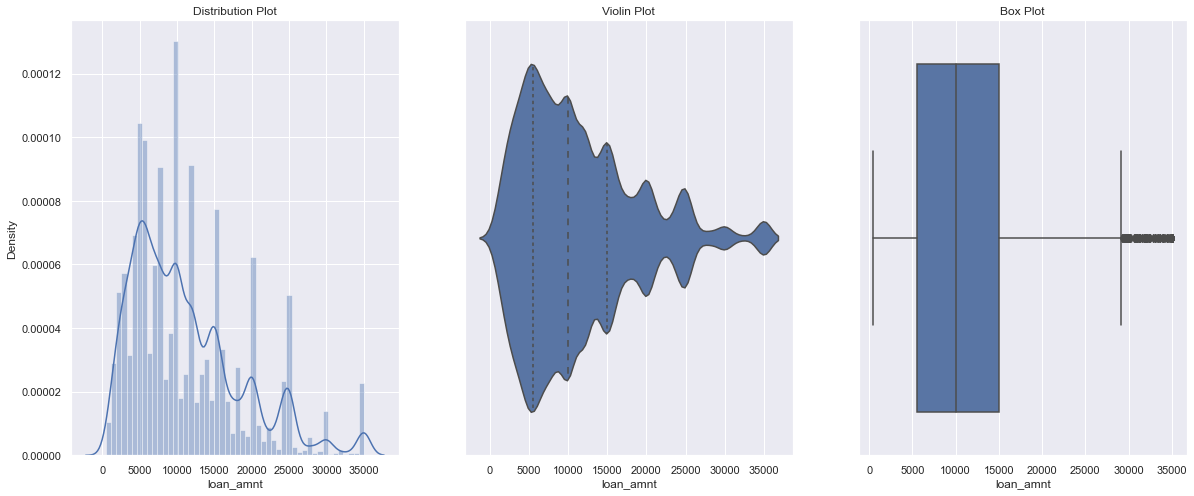

In [497]:
#Loan amnt
univariate(df=load_data_Eda,col='loan_amnt',vartype=0)

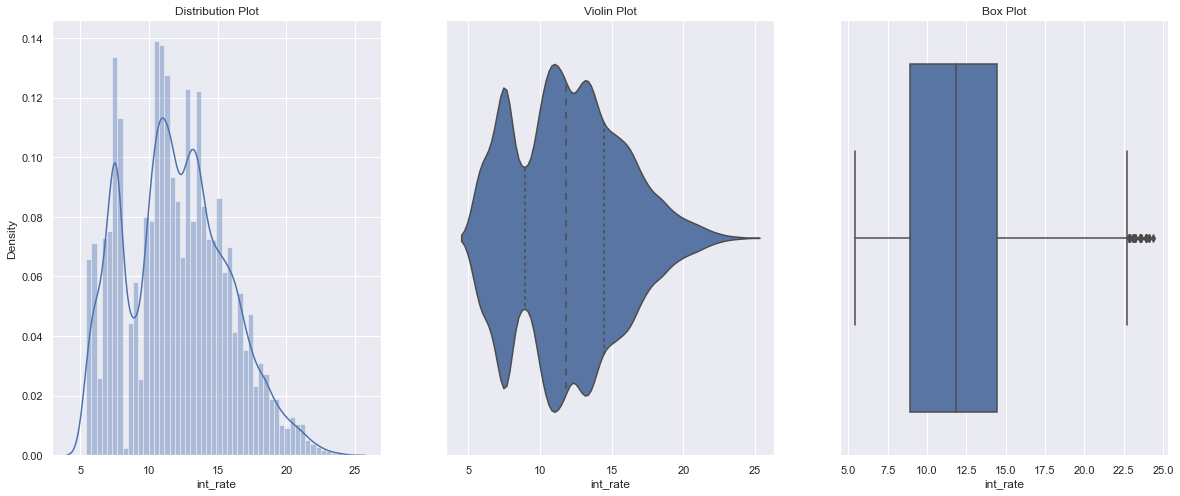

In [498]:
#Interest rate
univariate(df=load_data_Eda,col='int_rate',vartype=0)

Loan with higher interest are between 10 and 16%

<AxesSubplot:xlabel='loan_status', ylabel='count'>

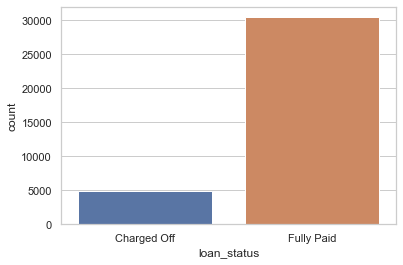

In [470]:

# lets visualize the plot for with fully paid and Charged off
sns.countplot(x = 'loan_status', data=load_data_Eda)

In [471]:
# lets treat the sub grade columns in the dataset which has grade columns with respective to the charged off columns
load_data_Eda.sub_grade = pd.to_numeric(load_data_Eda.sub_grade.apply(lambda x:x[-1]))
load_data_Eda.sub_grade.head()

1    4
3    1
5    4
6    5
7    1
Name: sub_grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

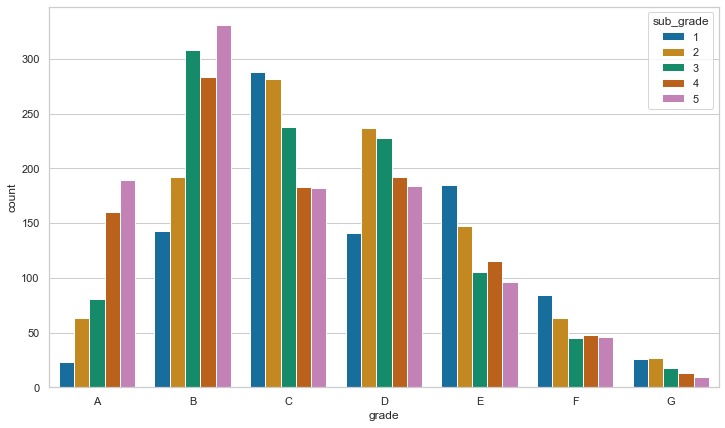

In [472]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = load_data_Eda[load_data_Eda.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='grade', ylabel='count'>

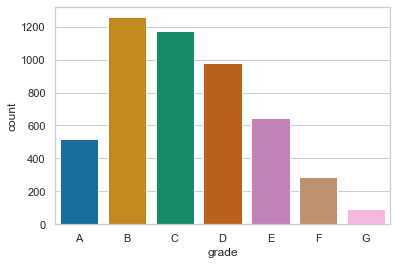

In [473]:
sns.countplot(x = 'grade', data = load_data_Eda[load_data_Eda.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

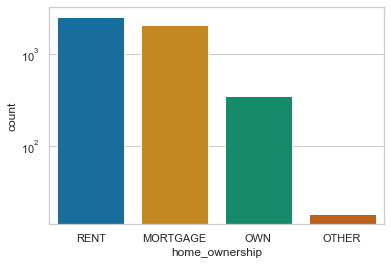

In [474]:
# Analize the home_ownership
fig, ax =plt.subplots(figsize=(6,4))
ax.set(yscale ='log')
sns.countplot(x='home_ownership', data=load_data_Eda[load_data_Eda['loan_status'] =='Charged Off'])

<AxesSubplot:xlabel='count', ylabel='purpose'>

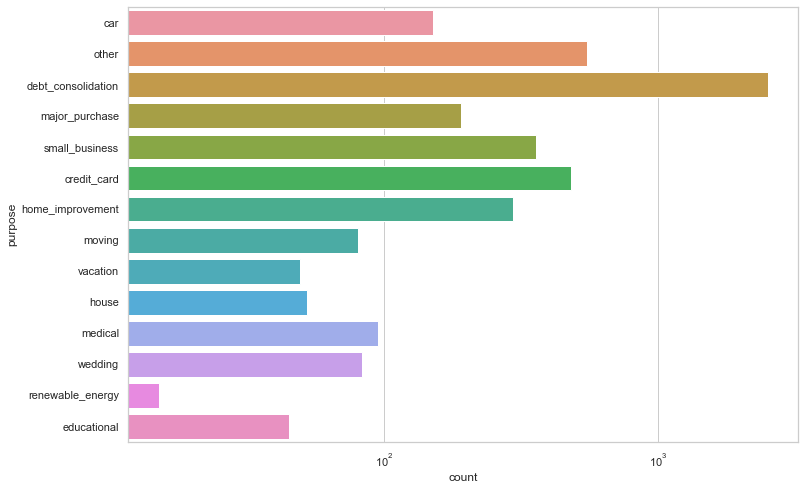

In [475]:
# Analyze the purpose of the loan
fig, ax = plt.subplots(figsize=(12,8))
ax.set(xscale='log')
sns.countplot(y='purpose',data=load_data_Eda[load_data_Eda.loan_status =='Charged Off'])

Creating bins for some numerical variable into categorical values

In [476]:

#creating bins for int_rate,open_acc,revol_util,total_acc
load_data_Eda['Int_Rate_Group'] = pd.cut(load_data_Eda['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
load_data_Eda['Open_Acc_Group'] = pd.cut(load_data_Eda['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
load_data_Eda['Revol_Util_Group'] = pd.cut(load_data_Eda['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
load_data_Eda['Total_Acc_Group'] = pd.cut(load_data_Eda['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
load_data_Eda['Annual_Income_Group'] = pd.cut(load_data_Eda['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [282]:
load_data_Eda.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,Int_Rate_Group,Open_Acc_Group,Revol_Util_Group,Total_Acc_Group,Annual_Income_Group
1,2500,60,15.27,59.83,C,4,Ryder,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,12,2011,4,1999,13%-17%,2-10,0-20,2-20,3k-31k,13%-17%,2-10,0-20,2-20,3k-31k
3,10000,36,13.49,339.31,C,1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0,0.0,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,12,2011,2,1996,13%-17%,2-10,20-40,20-37,31k-58k,13%-17%,2-10,20-40,20-37,31k-58k
5,5000,36,7.90,156.46,A,4,Veolia Transportaton,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.0,0.0,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,12,2011,11,2004,5%-9%,2-10,20-40,2-20,31k-58k,5%-9%,2-10,20-40,2-20,31k-58k
6,7000,60,15.96,170.08,C,5,Southern Star Photography,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,NC,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.0,0.0,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,12,2011,7,2005,13%-17%,2-10,80-100,2-20,31k-58k,13%-17%,2-10,80-100,2-20,31k-58k
7,3000,36,18.64,109.43,E,1,MKC Accounting,9,RENT,48000.0,Source Verified,2011-12-01,Fully Paid,car,Car Downpayment,CA,5.35,0,2007-01-01,2,4,0,8221,87.5,4,0.0,0.0,3939.14,3939.14,3000.00,939.14,0.00,0.00,0.00,2015-01-01,111.34,2014-12-01,0.0,12,2011,1,2007,17%-21%,2-10,80-100,2-20,31k-58k,17%-21%,2-10,80-100,2-20,31k-58k


<AxesSubplot:xlabel='emp_length', ylabel='count'>

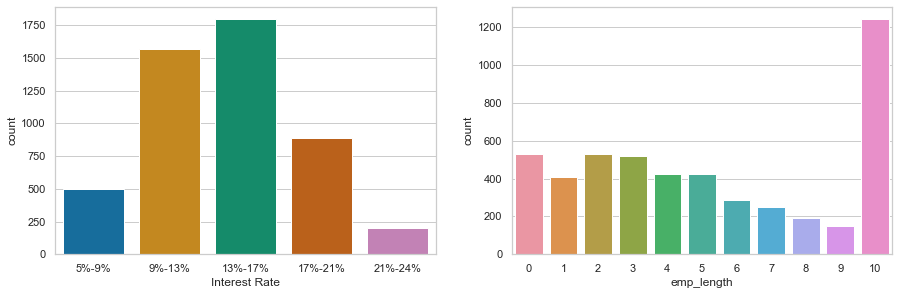

In [479]:
# Let anaylse with int_rate column with respect to the interest rate bins created
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='Int_Rate_Group', data=load_data_Eda[load_data_Eda.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=load_data_Eda[load_data_Eda.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='Open_Acc_Group', ylabel='count'>

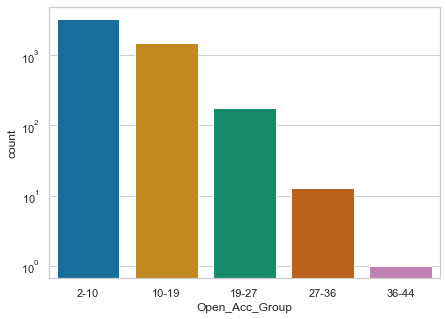

In [480]:
# lets anaylze open_acc, revol_util , tota_acc, annual_inc

fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='Open_Acc_Group', data=load_data_Eda[load_data_Eda.loan_status == 'Charged Off'])


<AxesSubplot:xlabel='Revol_Util_Group', ylabel='count'>

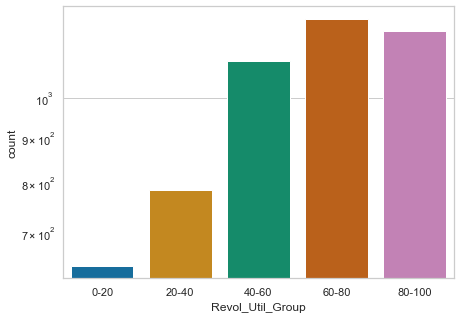

In [481]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='Revol_Util_Group', data=load_data_Eda[load_data_Eda.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='Total_Acc_Group', ylabel='count'>

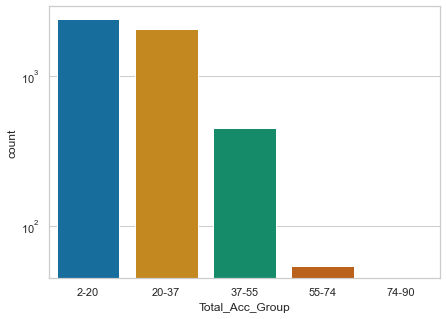

In [482]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='Total_Acc_Group', data=load_data_Eda[load_data_Eda.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='Annual_Income_Group', ylabel='count'>

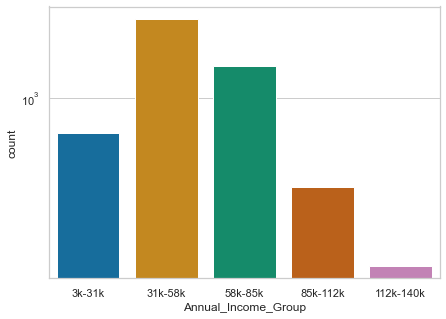

In [289]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='Annual_Income_Group', data=load_data_Eda[load_data_Eda.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='count', ylabel='term'>

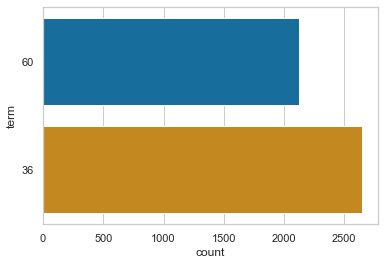

In [292]:
#let look into term of loan status with respect to the charged off
sns.countplot(y='term', data=load_data_Eda[load_data_Eda['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='verification_status', ylabel='count'>

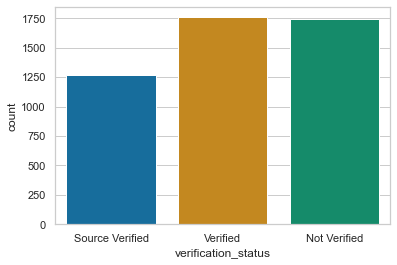

In [295]:

# check the verification status of loan status for charged off loans
sns.countplot(x='verification_status', data=load_data_Eda[load_data_Eda['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='inq_last_6mths', ylabel='count'>

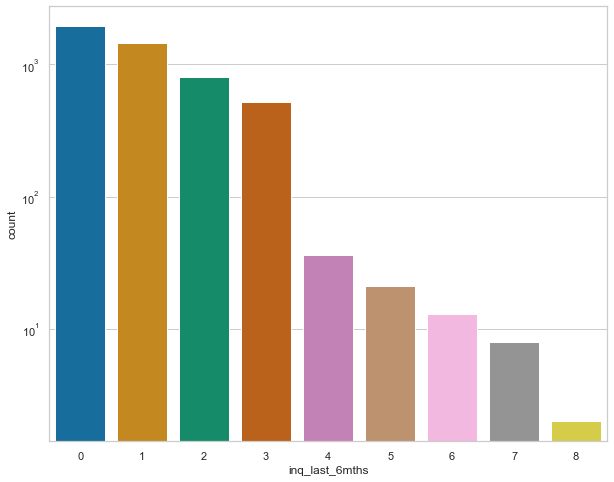

In [296]:

fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=load_data_Eda[load_data_Eda['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='pub_rec', ylabel='count'>

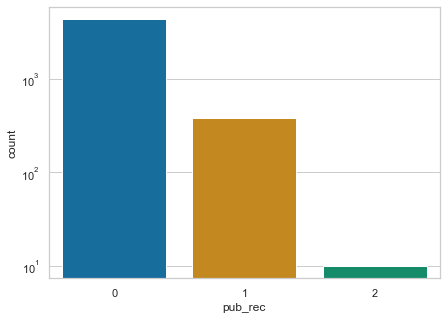

In [297]:

fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=load_data_Eda[load_data_Eda['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='issue_d_year', ylabel='count'>

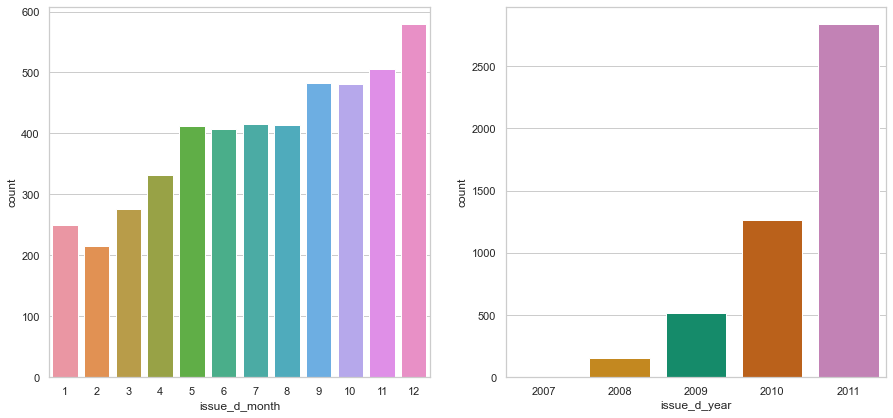

In [299]:
#lets work on the issued_d columns the columns that we have split in issue_d_month months and issue_d_year years

plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_d_month', data=load_data_Eda[load_data_Eda['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_d_year', data=load_data_Eda[load_data_Eda['loan_status']=='Charged Off'])


# The no of loans was sanctioned/issued in month december in year 2011 , has more no of defaults to compare other year

In [301]:
#lets analyse with dti , installment and loan_amt

load_data_Eda['Installment_Group'] = pd.cut(load_data_Eda['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
load_data_Eda['Loan_Amount_Group'] = pd.cut(load_data_Eda['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
load_data_Eda['Dti_Group'] = pd.cut(load_data_Eda['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])


<AxesSubplot:xlabel='Loan_Amount_Group', ylabel='count'>

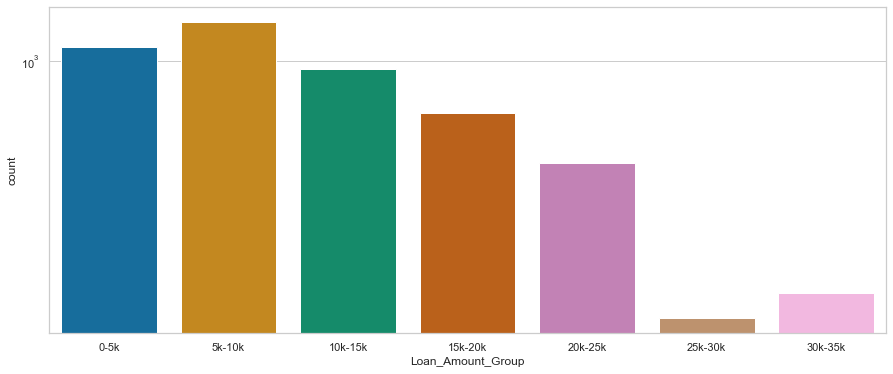

In [304]:

fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='Loan_Amount_Group', data=load_data_Eda[load_data_Eda['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='Installment_Group', ylabel='count'>

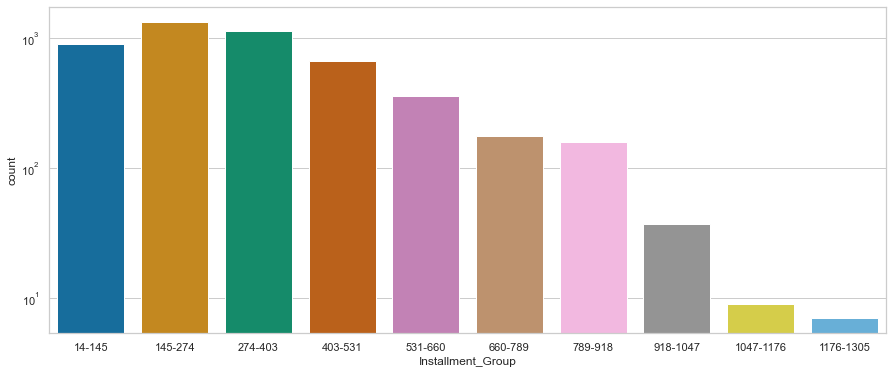

In [305]:

fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='Installment_Group', data=load_data_Eda[load_data_Eda['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='Dti_Group', ylabel='count'>

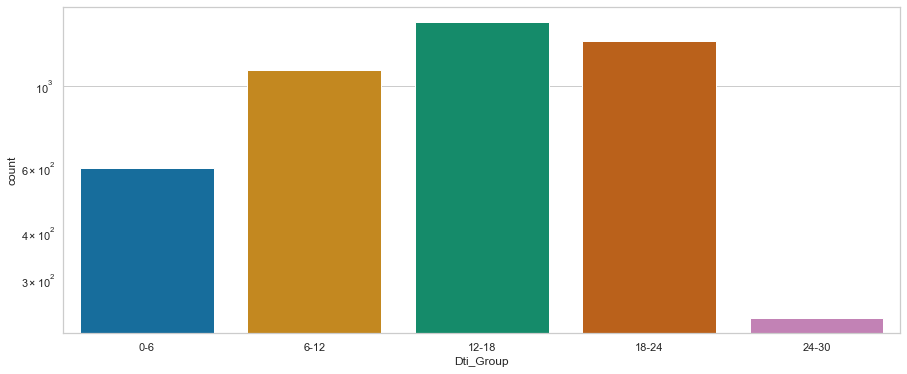

In [306]:

fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='Dti_Group', data=load_data_Eda[load_data_Eda['loan_status']=='Charged Off'])

# Observations

In the above analysis with respect to the charged off loans provide the following insights which  has more probabilty of defaulting loans when 
1. Applicants income range of 31000-59000
2. Loan amount is between 5000- 10000 approx
3. Dti is between 12-18
4. When there is no enquiry in last 6 months
5. If loan are in Grade B
6. If the Installment are in range of 145-270
7. Applicant who are levied with interest rate of 13-17%
8. If Applicant who is on Rental are subjected more default
9. If the purpose of the loan is to debt consolidation
10. If the employment length is 10 years
11. If the loan status is not verified
12. However majority of the loan issued in the month dec-2011 had more default perhaps may be due the recession in US

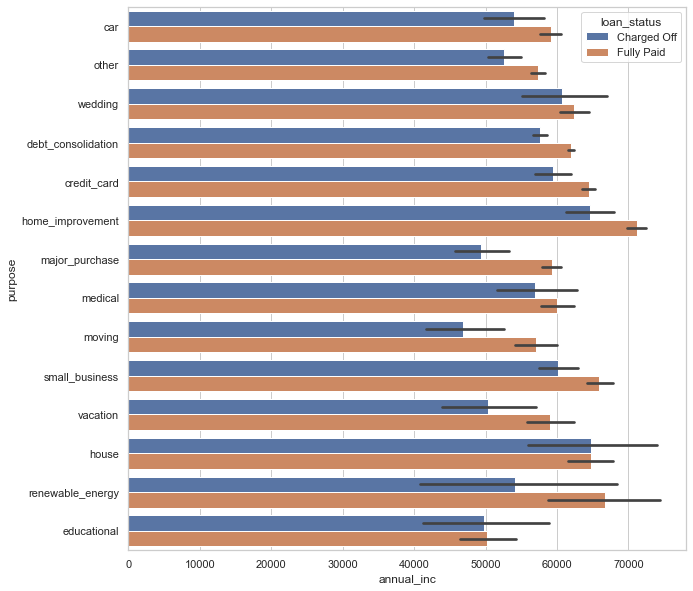

In [307]:
# lets analyse column annual income with respect to the other columns the for more insights
plt.figure(figsize=(10,10))
sns.barplot(data =load_data_Eda,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()


With higher annual income bracket group people has took the purpose of loan in home improvement , small business, house, renewable energy

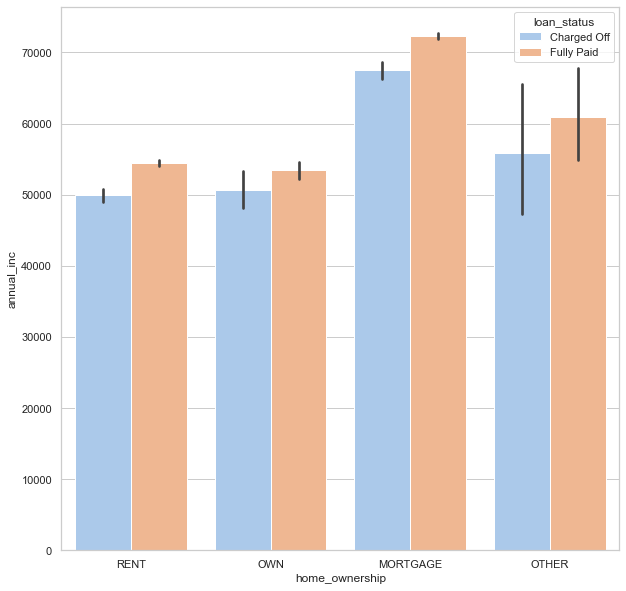

In [308]:
#  lets analyze with house ownership with annual income
plt.figure(figsize=(10,10))
sns.barplot(data =load_data_Eda,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

<AxesSubplot:xlabel='Annual_Income_Group', ylabel='loan_amnt'>

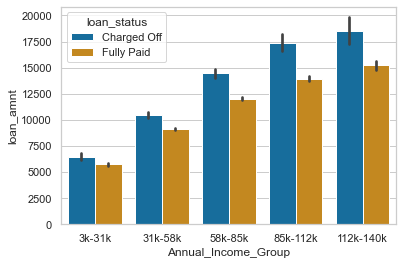

In [311]:
sns.barplot(x = "Annual_Income_Group", y = "loan_amnt", hue = 'loan_status', data = load_data_Eda)

With above observation it is found that higher amount of loan with all income group have defaulted the loan.

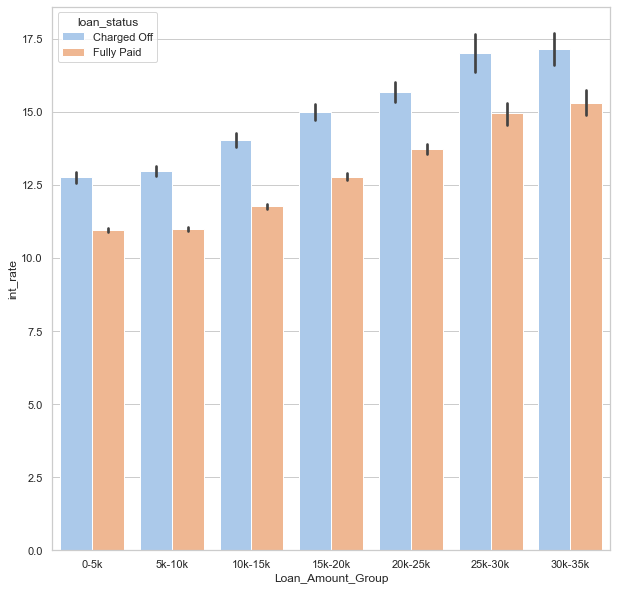

In [312]:
# analysing on loan amount with interest rate
plt.figure(figsize=(10,10))
sns.barplot(data =load_data_Eda,x='Loan_Amount_Group', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

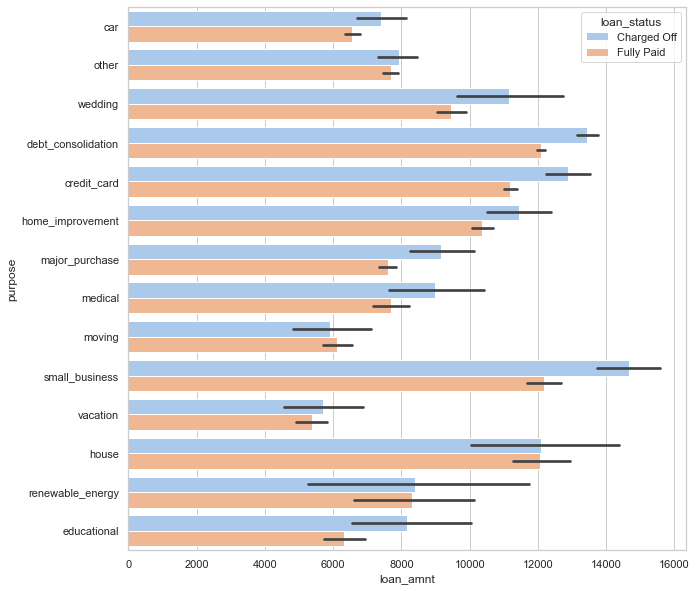

In [313]:
plt.figure(figsize=(10,10))
sns.barplot(data =load_data_Eda,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

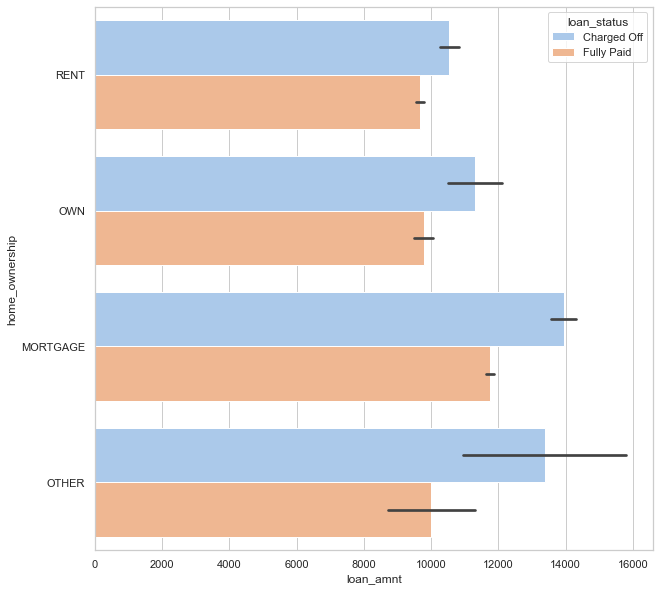

In [314]:
# Loan amount versus House Ownership
plt.figure(figsize=(10,10))
sns.barplot(data =load_data_Eda,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()


In [379]:
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

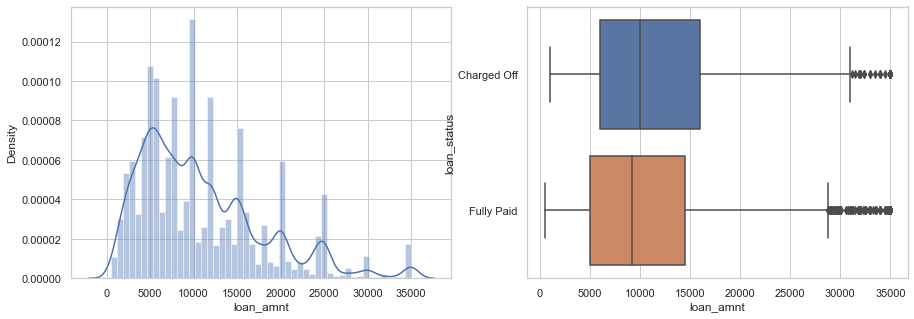

In [381]:
plot_distribution(load_data_Eda, 'loan_amnt')

# Bivariate Analysis

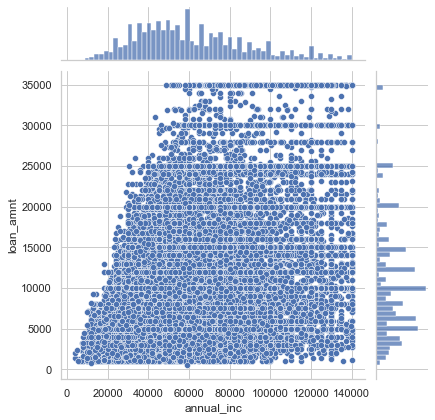

In [385]:
# anaylsing with loan_amnt with annual inc
sns.jointplot('annual_inc','loan_amnt', load_data_Eda.loc[load_data_Eda['annual_inc'] < 260000])

> People who are taking loan 25000 higher has average income lower 50000 , it will be risky loans

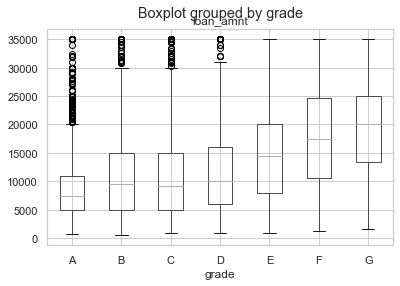

In [388]:
# anaylsing loan_amt with grade
load_data_Eda.boxplot(column='loan_amnt', by='grade')
plt.show()

Median loan for grade G loan being almot 10000 higher than grade of A , B or C ,since the larger loans generally appear to be given lower grade

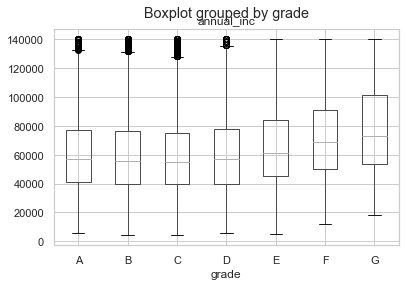

In [392]:
load_data_Eda.loc[load_data_Eda['annual_inc'] < 260000].boxplot(column='annual_inc', by='grade')
plt.show()

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

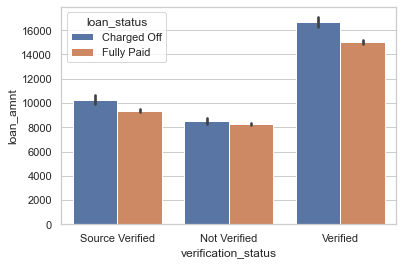

In [393]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=load_data_Eda, estimator=np.mean)

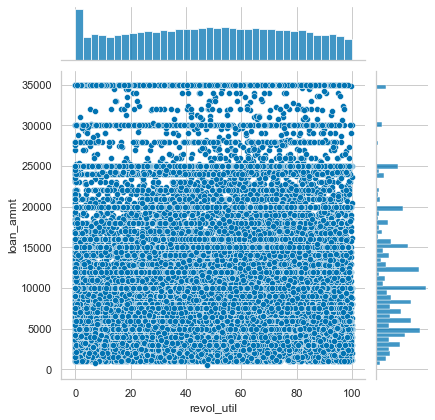

In [484]:
sns.jointplot('revol_util','loan_amnt', load_data_Eda)

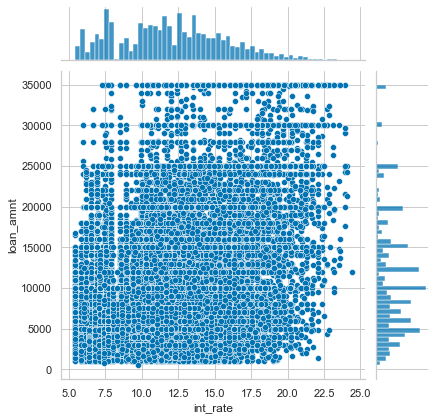

In [485]:
sns.jointplot('int_rate','loan_amnt',load_data_Eda)

In [493]:
corr=load_data_Eda.corr()
corr['loan_amnt']

loan_amnt                  1.000000
int_rate                   0.300099
installment                0.930808
sub_grade                  0.029006
emp_length                 0.143562
annual_inc                 0.259342
dti                        0.063141
delinq_2yrs               -0.035337
inq_last_6mths             0.010249
open_acc                   0.174733
pub_rec                   -0.047246
revol_bal                  0.320164
revol_util                 0.067232
total_acc                  0.256218
out_prncp                       NaN
out_prncp_inv                   NaN
total_pymnt                0.884324
total_pymnt_inv            0.860252
total_rec_prncp            0.848860
total_rec_int              0.728934
total_rec_late_fee         0.046608
recoveries                 0.143571
collection_recovery_fee    0.079360
last_pymnt_amnt            0.477680
pub_rec_bankruptcies      -0.030464
issue_d_month              0.051427
issue_d_year               0.115912
earliest_cr_line_month    -0

<AxesSubplot:>

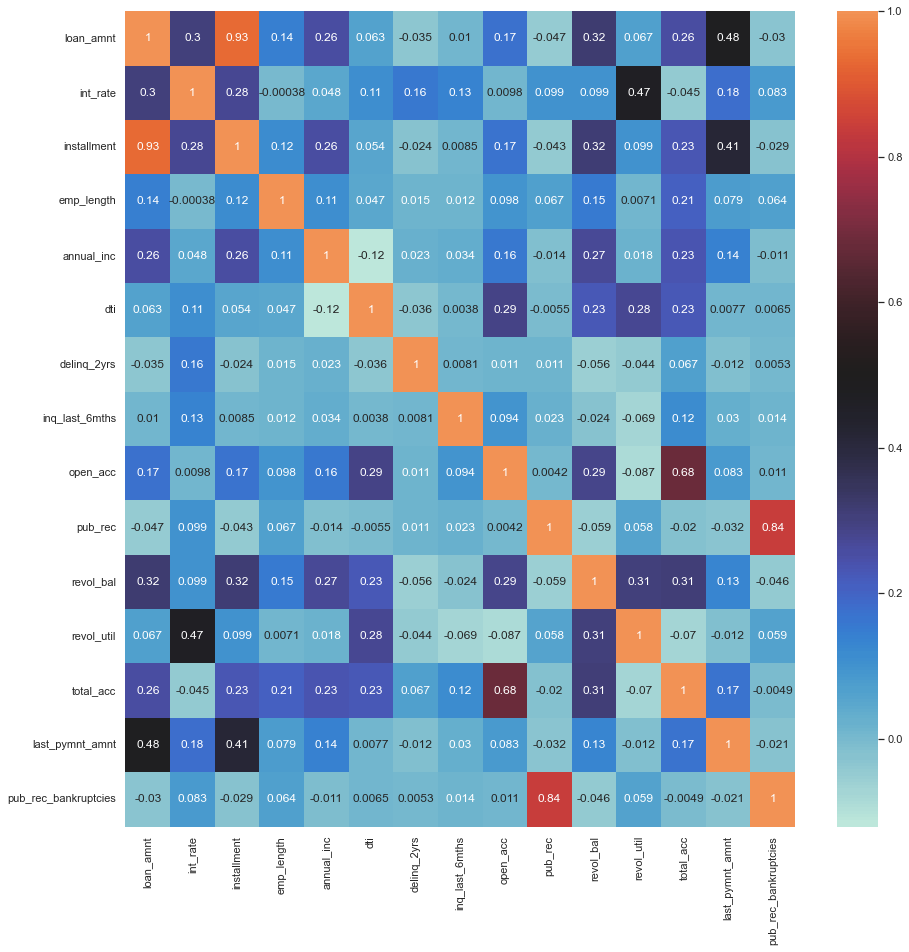

In [494]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = load_data_Eda[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

1. loan_amnt is correlated to last_payment with r factor .48
2. int_rate is correlated to revol_util with r factor .47 , this is good sign that loans are charged with higher interest rate from risky loan
3. loan_amnt and revol_bal are correlated with r factor .32 this is not a good sign due higher amount of loan is been approved     to high risk borrowers.

<AxesSubplot:xlabel='issue_d_year'>

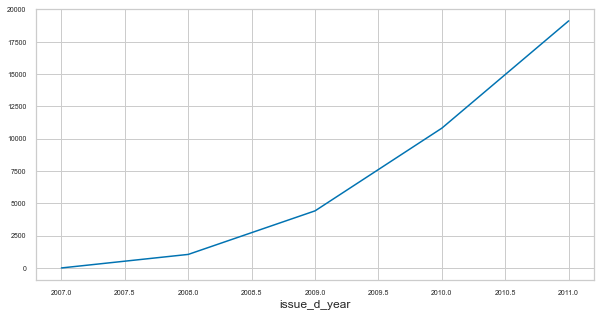

In [487]:
# loan_amnt vs over time
plt.figure(figsize=(10,5))
load_data_Eda.groupby('issue_d_year').loan_amnt.count().plot(kind='line',fontsize=7)

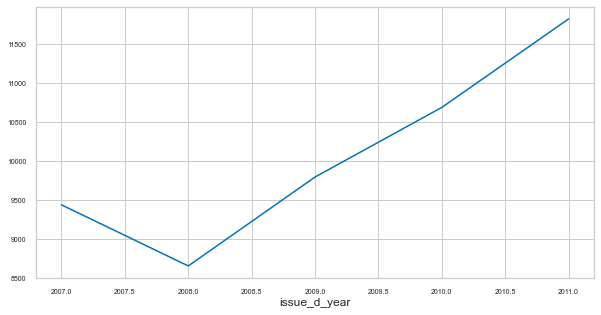

In [488]:
# analysis on  avg loan_amnt vs over time
plt.figure(figsize=(10,5))
load_data_Eda.groupby('issue_d_year').loan_amnt.mean().plot(kind='line', fontsize=7)
plt.show()


<AxesSubplot:title={'center':'int_rate'}, xlabel='loan_status'>

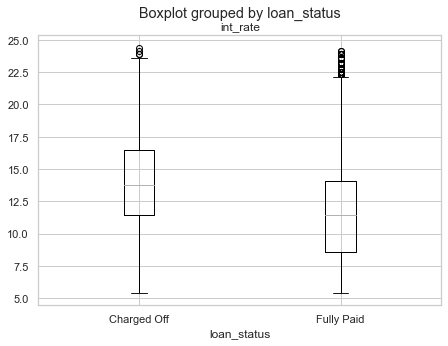

In [489]:
load_data_Eda.boxplot(column='int_rate', by='loan_status',figsize=(7,5))

Loans with higher interest rate are more likely to Charged off

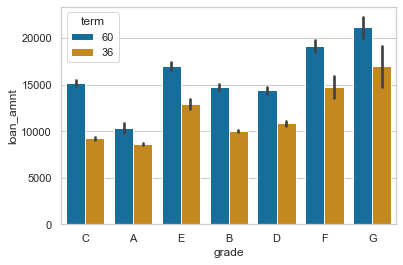

In [490]:
# Loan_amnt vs grade vs term
sns.barplot(x='grade', y='loan_amnt', hue="term", data=load_data_Eda, estimator=np.mean)
plt.show()


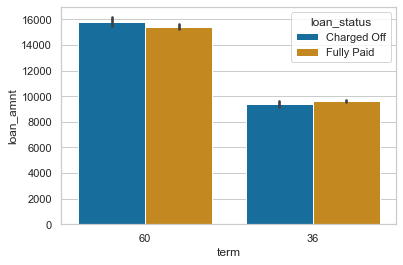

In [491]:
# loan_amnt vs term vs loan status
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=load_data_Eda, estimator=np.mean)
plt.show()

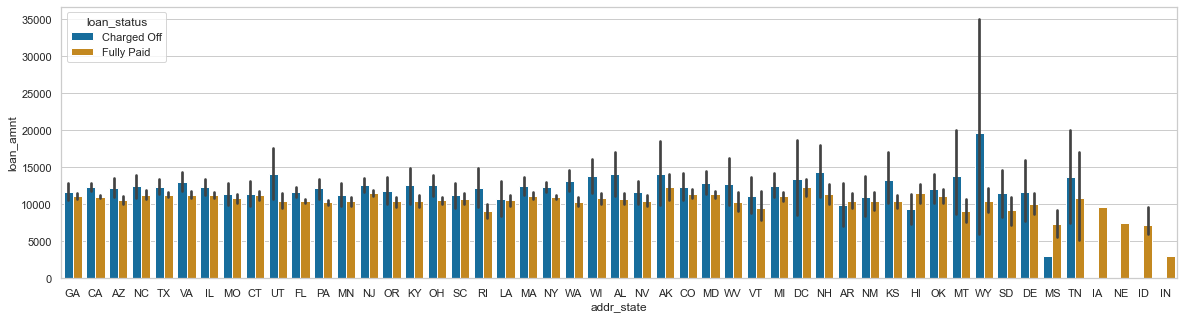

In [492]:
# Loan _amnt vs addr_state vs loan status
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=load_data_Eda, estimator=np.mean)
plt.show()

States like WY, TN and UT has highest avg loan amount that was charged off, this what Lender have to look into it.

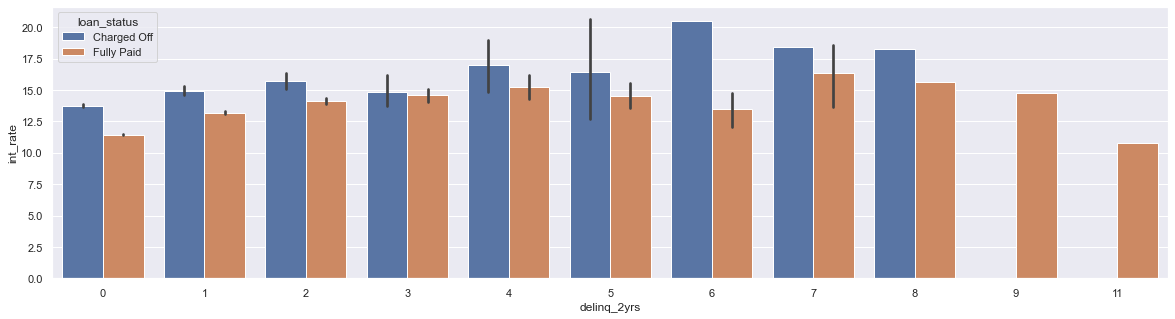

In [500]:
#delinq_2yra vs int_rate vs loan_status
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=load_data_Eda, estimator=np.mean)
plt.show()

deliquency of the borrower has increaded with rate of interest been offered increased

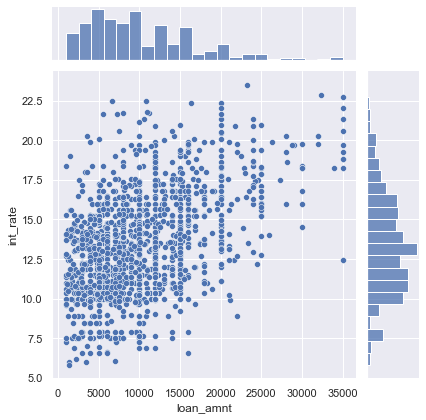

In [501]:

sns.jointplot('loan_amnt', 'int_rate', load_data_Eda.loc[load_data_Eda.pub_rec_bankruptcies > 0])

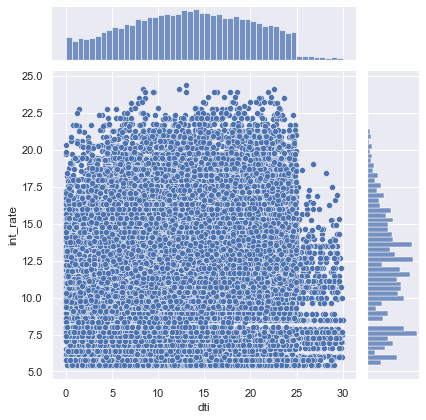

In [508]:
sns.jointplot('dti', 'int_rate', load_data_Eda)

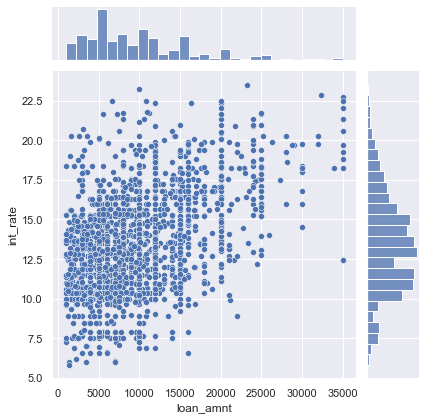

In [503]:
sns.jointplot('loan_amnt', 'int_rate', load_data_Eda.loc[load_data_Eda.pub_rec > 0])

In [504]:
load_data_Eda[['pub_rec','pub_rec_bankruptcies']].corr()

,pub_rec,pub_rec_bankruptcies
pub_rec,1.000000,0.839134
pub_rec_bankruptcies,0.839134,1.000000


In [511]:
def probab_code(df,col):
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['charge_off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

In [512]:
def plotting_code(df,col,stacked= True):
    plotCrosstab = probab(df,col)
    linePlot = plotCrosstab[['charge_off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(22,9), marker='o',color = 'k')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_ylabel('Probability of Charged off',color = 'g',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'y',fontsize=14)
    plt.show()

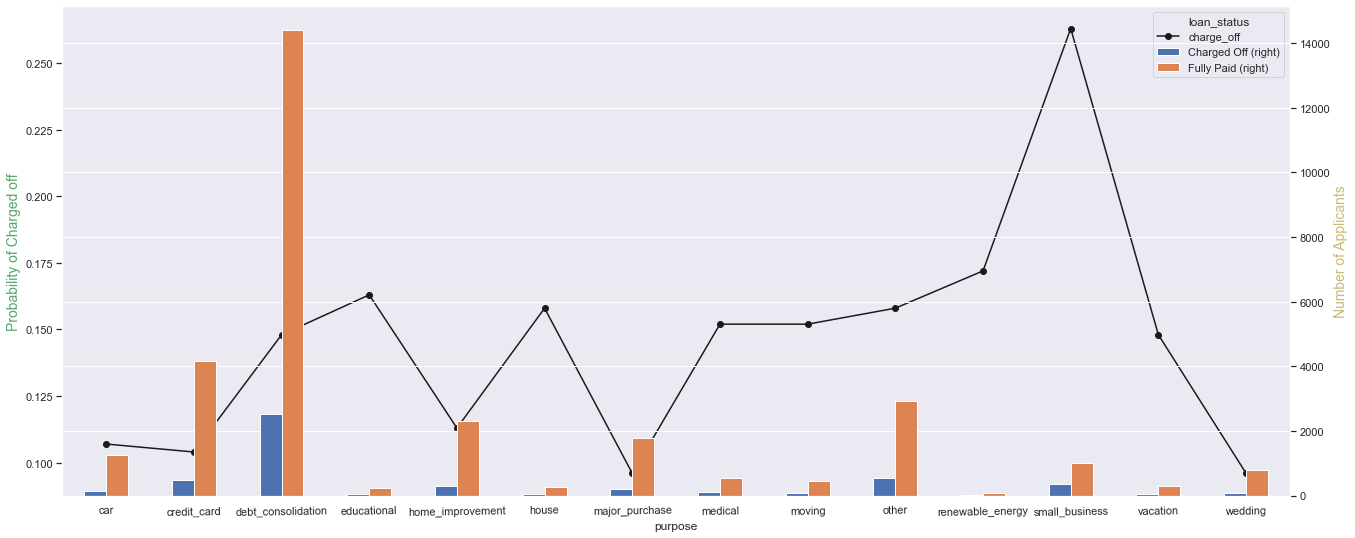

In [514]:
plotting_code(df=load_data_Eda, col='purpose',stacked=False)

Applicants who has taken the Loan for 'wedding' has the lowest probabilty of charge off of less than 1%, which gaurantees the loan will be payed off where as on the other hand it is observed that the 'small_business' has the highest probability of charge off with 26% which clearly states that banks should be extra careful when approving loans for the purpose of small business and after verfying the guarentee assets the loan should be approved and proper credit approval process should be followed for this purpose.

# Recommendations:


Final Take away with analysis

--> Probability of charging off loans with respect to the analysis are 
1. If applicant taking loan for 'home imprvement' and having higher income bracket of 60-70k
2. Loan amount range 30-35k with interest charged rate of 15-17.5%
3. Home ownership is 'Mortgage'and with loan of 14-16k
4. Employment length is 10 years with loan amount 12-14k
5. Grade G with higher interest rate of 20% 


